In [1]:
using Pkg; Pkg.activate("../../../")
using Revise, CausalityTools
using CairoMakie

  Activating project at `~/Code/Repos/Temp/CausalityTools.jl`


In [6]:
v1 = [1, 2, 1, 2, 3, 1, 2, 3, 1, 2];
v2 = [2, 1, 2, 2, 2, 2, 1, 1, 1, 1];
v3 = [4, 3, 2, 1, 4, 3, 3, 2, 1, 2];
contingency_matrix(v1, v2, v3)

┌ Error: Failed to revise /Users/work/Code/Repos/Temp/CausalityTools.jl/src/methods/infomeasures/contingency_matrices.jl
│   exception = Revise.ReviseEvalException("/Users/work/Code/Repos/Temp/CausalityTools.jl/src/methods/infomeasures/none:0", ErrorException("invalid redefinition of constant ContingencyMatrix"), Any[(top-level scope at none:0, 1)])
└ @ Revise /Users/work/.julia/packages/Revise/do2nH/src/packagedef.jl:715


MethodError: MethodError: no method matching contingency_matrix(::Vector{Int64}, ::Vector{Int64})
Closest candidates are:
  contingency_matrix(!Matched::ProbabilitiesEstimator, ::Any...) at ~/Code/Repos/Temp/CausalityTools.jl/src/methods/infomeasures/contingency_matrices.jl:73

In [11]:
x = rand(1:5, 50000) 
y = rand(1:7, 50000)
xy = Dataset(x, y)

Ls = [100:100:500; 1000:1000:10000; 25000:25000:50000]
hs_c = zeros(length(Ls))
hs_naive = zeros(length(Ls))
hs_c_aive = zeros(length(Ls))


for (i, L) in enumerate(Ls)
    probs_x = probabilities(x[1:L])
    probs_y = probabilities(y[1:L])
    hs_naive[i] = entropy(Shannon(), CountOccurrences(), xy[1:L])

    c = ContingencyMatrix(x[1:L], y[1:L])
    hs_c[i] = entropy_joint(JointEntropyShannon(), c)
end

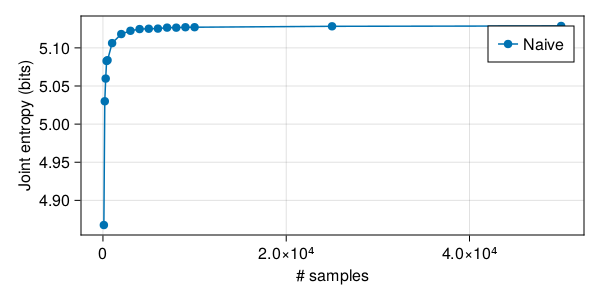

In [12]:
fig = Figure(resolution = (600, 300))
ax = Axis(fig[1, 1], xlabel = "# samples", ylabel = "Joint entropy (bits)")
scatterlines!(Ls, hs_naive, label = "Naive")
#scatterlines!(Ls, hs_c, label = "Contingency")
axislegend()
fig

In [4]:
c = ContingencyMatrix(x, y)

UndefVarError: UndefVarError: x not defined

In [5]:
function cont(x, y)
    probs_x = probabilities(x);
    probs_y = probabilities(y);
    pc = transpose(probs_y) .* probs_x
end

cont (generic function with 1 method)

In [6]:
cont(x, y) ≈ ContingencyMatrix(x, y)

UndefVarError: UndefVarError: x not defined

In [7]:
function mutualinfo(x, y)
    c = ContingencyMatrix(x, y)
end

mutualinfo (generic function with 1 method)

In [284]:
x = rand(1:5, 1000);   y = rand(1:5, 1000);
mutualinfo(x, y)

5×5 ContingencyMatrix{Float64, 2, Probabilities{Float64}}:
 0.042024  0.042436  0.044084  0.038316  0.03914
 0.040188  0.040582  0.042158  0.036642  0.03743
 0.041412  0.041818  0.043442  0.037758  0.03857
 0.037536  0.037904  0.039376  0.034224  0.03496
 0.04284   0.04326   0.04494   0.03906   0.0399

In [285]:
X = [0.09 0.16 0.05; 0.02 0.38 0.1; 0.01 0.05 0.14]
mutti(X)

0.2126269227342209

In [311]:
function mutti(pXY; base = 2)
    pX = dropdims(sum(pXY, dims = 2), dims = 2)
    pY = dropdims(sum(pXY, dims = 1), dims = 1)

    mi = 0.0
    for (i, x) in enumerate(pX)
        for (j, y) in enumerate(pY)
            mi += pXY[i, j] * CausalityTools.log0(base, pXY[i, j] / (x*y))
        end
    end

    entropy(Probabilities(pX)) + entropy(Probabilities(pY)) - 
        entropy(Probabilities(vec(pXY)))
    #return mi
end

mutti (generic function with 1 method)

In [352]:
M = [0.2 0.1 0.2; 0 0.2 0.1; 0.1 0 0.1]
mutti(M; base = 2)

0.33449779679464076

In [313]:
#c = ContingencyMatrix(rand(1:3, 100), rand(1:5, 100))


In [367]:
v1 = (2, 4, 3, 1, 6, 3, 2, 1, 4, 5)
v2 = (2, 2, 2, 2, 2, 2, 3, 1, 1, 1)

#y = floor.(Int, sin.(x) .* 3)
#xy = Dataset(x, y)
c = ContingencyMatrix(v1, v2)

6×3 ContingencyMatrix{Float64, 2, Probabilities{Float64}}:
 6.0  12.0  2.0
 6.0  12.0  2.0
 6.0  12.0  2.0
 6.0  12.0  2.0
 3.0   6.0  1.0
 3.0   6.0  1.0

In [504]:
v = rand(2:4, 10)
w = copy(v)
tolevels!(w)

ls = Dict(6.0 => 1, 2.0 => 4, 12.0 => 3, 3.0 => 2, 1.0 => 5)


KeyError: KeyError: key 4 not found

In [258]:
est = CountOccurrences()
mi3h = MIShannon(definition = MIDefinitionGeneric())
mids = MIShannon(definition = MIDefinitionShannonDoubleSum())
estimate(mi3h, x, y), estimate(mids, x, y)

(0.2916919971380598, 3.9225630658958166e-17)

length.(x) = (10, 10, 10)
pΩs = Tuple{Probabilities{Float64}, Vector{Int64}}[([0.2, 0.2, 0.2, 0.2, 0.1, 0.1], [1, 2, 3, 4, 5, 6]), ([0.3, 0.6, 0.1], [1, 2, 3]), ([0.5, 0.4, 0.1], [1, 2, 3])]


MethodError: MethodError: no method matching ContingencyMatrix(::Array{Float64, 3}, ::Array{Int64, 3}, ::Tuple{Vector{Any}, Vector{Any}}, ::Tuple{Vector{Any}, Vector{Any}})
Closest candidates are:
  ContingencyMatrix(::AbstractArray{T, N}, !Matched::AbstractArray{T, N}, !Matched::Array{AbstractVector{T}, 1}, !Matched::Vector{O}) where {T, N, O} at ~/Code/Repos/Temp/CausalityTools.jl/src/methods/infomeasures/contingency_matrices.jl:59